##Introduction
###The Air Passenger Data is a well-known dataset in time series analysis, containing the monthly totals of international airline passengers from January 1949 to December 1960. This dataset is frequently used to demonstrate various time series forecasting methods due to its clear upward trend and seasonal patterns.

###In this project, we aim to analyze this time series data to uncover underlying patterns, trends, and seasonality. We will apply the ARIMA (AutoRegressive Integrated Moving Average) model to forecast future airline passenger traffic. ARIMA is a powerful and widely-used technique for time series forecasting, capable of capturing both short-term and long-term dependencies in the data.

###Through this analysis, we will:

* Explore and visualize the data to understand its structure.
* Preprocess the dataset to make it ready for ARIMA modeling.
* Build, train, and tune the ARIMA model to predict future passenger numbers.
* Evaluate the performance of the model using appropriate metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

###This project will offer valuable insights into forecasting techniques and their practical applications in real-world datasets, such as predicting passenger demand, optimizing flight schedules, and enhancing airline operational efficiency.

##Importing Necessary Libraries.

In [2]:
import pandas as pd #It imports the pandas library and assigns it the alias "pd" for easier use.
import numpy as np #It brings in a tool called numpy, nicknamed "np", to help with number crunching in your code.
import matplotlib.pyplot as plt #It imports plotting tools from matplotlib, nicknamed "plt", for creating visualizations.
import seaborn as sn #It imports the seaborn library, nicknamed "sns", for making statistical visualizations

###Loading the Dataframe

In [4]:
df = pd.read_csv("AirPassengers (1).csv") #It reads data from the "AirPassengers (1).csv" file and stores it in a table called "df" using pandas

In [5]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


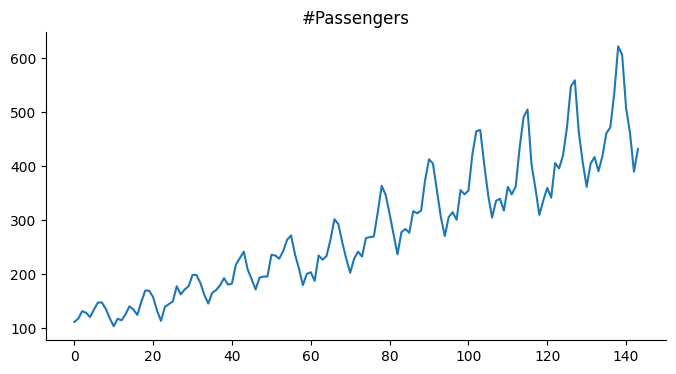

In [6]:
#creating a line plot of the #Passengers data from the DataFrame df
from matplotlib import pyplot as plt
df['#Passengers'].plot(kind='line', figsize=(8, 4), title='#Passengers')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
df.columns #It shows the names of all the columns in the DataFrame df.

Index(['Month', '#Passengers'], dtype='object')

In [8]:
df["Month"]= pd.to_datetime(df["Month"])
#This line converts the 'Month' column in your DataFrame (df) to datetime objects.
#This is important for time series analysis as it allows pandas to understand the temporal order of your data.
df #Shows the updated DataFrame.

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


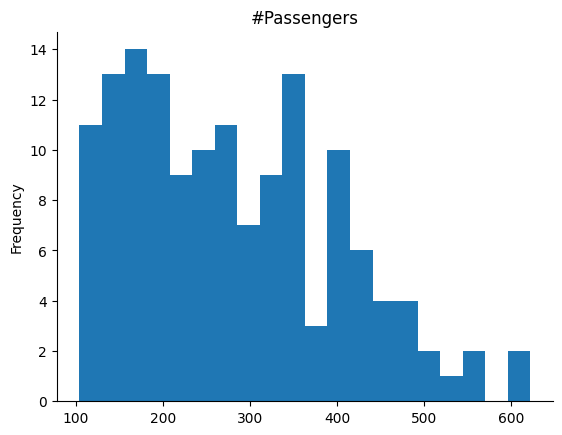

In [10]:
from matplotlib import pyplot as plt
df['#Passengers'].plot(kind='hist', bins=20, title='#Passengers')
plt.gca().spines[['top', 'right',]].set_visible(False)
#It creates a histogram of the '#Passengers' data, with 20 bins


In [11]:
df.dtypes #It shows the data type of each column in the DataFrame df.

,0
Month,datetime64[ns]
#Passengers,int64


In [12]:
df.set_index("Month",inplace=True)
#This line sets the 'Month' column as the index of the DataFrame df. inplace=True modifies the DataFrame directly instead of creating a copy.
df #This line simply displays the DataFrame df after the index has been set.

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


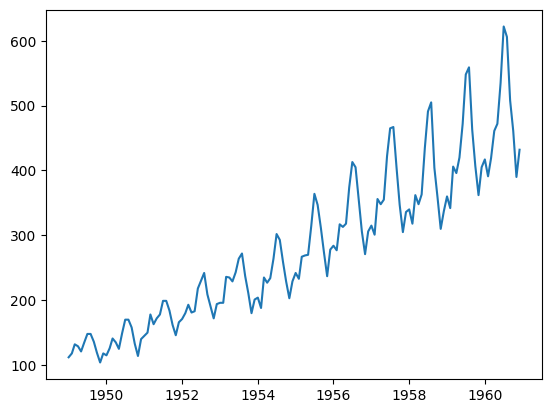

In [13]:
plt.plot(df['#Passengers'])

Creating a simple line plot of the '#Passengers' data over time, using the 'Month' column (which was previously set as the index) as the x-axis. This visualization helps see trends and patterns in passenger numbers over time.

In [14]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_, nobs_, critical_values, icbest_ = adfuller(df)

It performs the Augmented Dickey-Fuller test (ADF) to check if the time series data in df is stationary and stores the results in several variables. The test helps determine if the data has a unit root, which would indicate non-stationarity.

In [15]:
print(pvalue) #if pvalue > 0.05 then data is not stationary

0.991880243437641


In [16]:
df["year"]= [d.year for d in df.index]
#This line creates a new column called "year" in the DataFrame df.
#It populates this column by extracting the year from each value in the index (which is assumed to be a DatetimeIndex representing the 'Month').
df #This line simply displays the DataFrame df after the new column has been added.

,#Passengers,year
Month,,
1949-01-01,112,1949
1949-02-01,118,1949
1949-03-01,132,1949
1949-04-01,129,1949
1949-05-01,121,1949
...,...,...
1960-08-01,606,1960
1960-09-01,508,1960
1960-10-01,461,1960


In [17]:
df['month'] = df.index.strftime('%b')
#This code adds a 'month' column to the DataFrame, containing the abbreviated month names derived from the index, making it easier to analyze data based on monthly patterns or trends.
df

,#Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
...,...,...,...
1960-08-01,606,1960,Aug
1960-09-01,508,1960,Sep
1960-10-01,461,1960,Oct


In [18]:
years= df['year'].unique()
#It gets a list of all the unique years present in the 'year' column of the DataFrame df and assigns it to the variable years.
years

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960])

<Axes: xlabel='year', ylabel='#Passengers'>

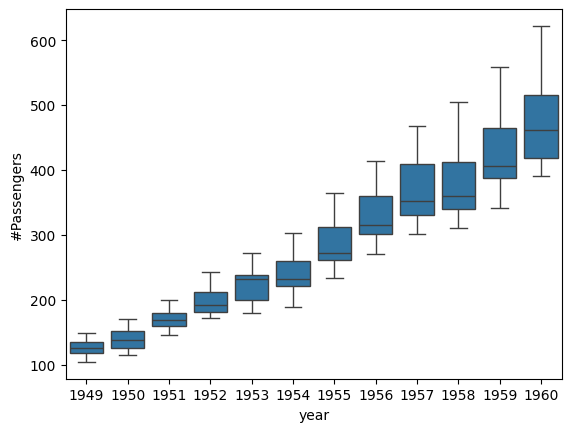

In [20]:
sn.boxplot(x='year',y='#Passengers',data=df)

<Axes: xlabel='month', ylabel='#Passengers'>

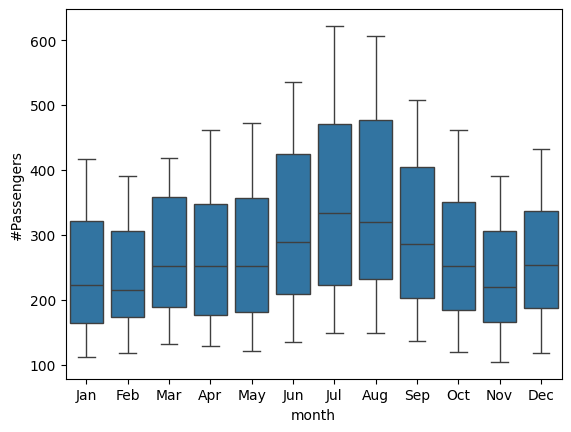

In [21]:
sn.boxplot(x='month', y='#Passengers', data=df)

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose= seasonal_decompose(df['#Passengers'],
                              model='additive'
                              )
#It breaks down the time series data in df['#Passengers'] into its seasonal, trend, and residual components using an additive model. This decomposition helps understand the underlying patterns within the data.


In [23]:
trend= decompose.trend #This line extracts the overall upward or downward movement (trend) from the decomposed time series data and assigns it to the variable trend.
seasonal=decompose.seasonal #This line extracts the repeating patterns or cycles (seasonality) within the data and assigns it to the variable seasonal.
residual=decompose.resid #This line extracts the remaining noise or random fluctuations (residuals) after removing the trend and seasonality and assigns it to the variable residual.

In [24]:
trend

,trend
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN


In [25]:
seasonal

,seasonal
Month,
1949-01-01,-24.748737
1949-02-01,-36.188131
1949-03-01,-2.241162
1949-04-01,-8.036616
1949-05-01,-4.506313
...,...
1960-08-01,62.823232
1960-09-01,16.520202
1960-10-01,-20.642677


In [26]:
residual

,resid
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN


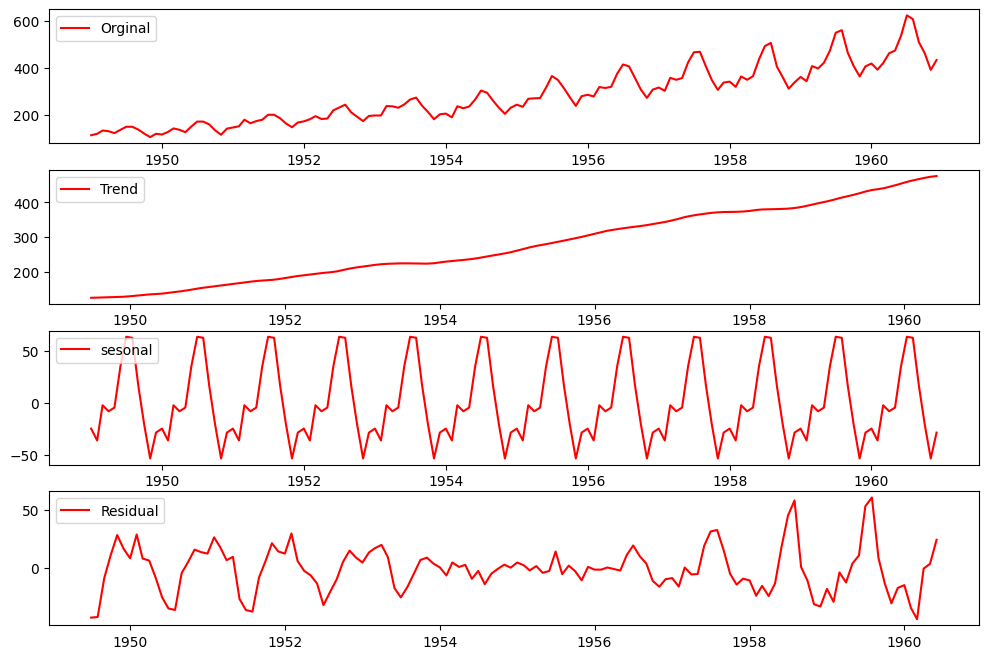

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df["#Passengers"],label="Orginal",color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label="sesonal",color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

In [28]:
!pip install pmdarima
from pmdarima.arima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.7 MB/s eta 0:00:00


In [29]:
arima_model=auto_arima(df["#Passengers"], start_p=1, d=1, q=1,
                       max_p=5, max_d=5, max_q=5, m=12,
                       start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                       seasonal=True,
                       trace=True,
                       error_action='ignore',
                       supress_warning=True,
                       stepwise=True, n_fits=50)
#After executing this code, the arima_model variable will contain the best-fitting ARIMA model selected by the auto_arima function.
#This model can then be used for forecasting or further analysis of the time series data.

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.68 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.43 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.70 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.92 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.82 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.01 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.44 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=3.98 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.55 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.70 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.44 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [30]:
arima_model.summary()
#It displays a summary of the fitted ARIMA model, including details like the chosen model order, coefficients, statistical significance of the parameters, and goodness-of-fit metrics.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 18 Oct 2024   AIC                           1019.178
Time:                                     18:17:42   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
size = int(len(df) * 0.66)
x_train, x_test = df[:size], df[size:]
#this code divides your dataset into two subsets: one for training the ARIMA model and another for testing its performance on unseen data.

In [32]:
x_train.shape

(95, 3)

In [33]:
x_test.shape

(49, 3)

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
model=SARIMAX(x_train["#Passengers"],
             order=(0,1,1),
             seasonal_order=(2,1,1,12))
result=model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                   95
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -300.269
Date:                            Fri, 18 Oct 2024   AIC                            610.537
Time:                                    18:30:05   BIC                            622.571
Sample:                                01-01-1949   HQIC                           615.368
                                     - 11-01-1956                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3201      0.103     -3.115      0.002      -0.522      -0.119
ar.S.L12       0.6847      0.613      1.116      0.264      -0.517       1.887
ar.S.L24       0.3142      0.127      2.476      0.013       0.066       0.563
ma.S.L12      -0.9812      5.504     -0.178      0.859     -11.769       9.806
sigma2        78.6460    384.747      0.204      0.838    -675.444     832.736
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.95   Prob(JB):                         0.28
Heteroskedasticity (H):               1.69   Skew:                             0.42
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
start_index=0
end_index=len(x_train)-1
train_prediction=result.predict(start_index, end_index)
train_prediction
#It generates predictions for the training data (x_train["#Passengers"]) using the fitted SARIMAX model and stores them in train_prediction.

,predicted_mean
1949-01-01,0.000000
1949-02-01,111.998298
1949-03-01,117.999818
1949-04-01,131.999574
1949-05-01,129.000091
...,...
1956-07-01,419.543859
1956-08-01,398.687816
1956-09-01,365.414676
1956-10-01,320.670003


In [37]:
st_index=len(x_train)
ed_index=len(df)-1
predction=result.predict(st_index,ed_index)
predction
#this code uses the trained SARIMAX model to forecast values for the testing dataset and then shows the predicted values.

,predicted_mean
1956-12-01,311.113955
1957-01-01,320.267623
1957-02-01,310.945643
1957-03-01,351.862586
1957-04-01,349.886437
1957-05-01,355.071049
1957-06-01,411.895842
1957-07-01,457.099797
1957-08-01,445.091982
1957-09-01,395.832743


<Axes: xlabel='Month'>

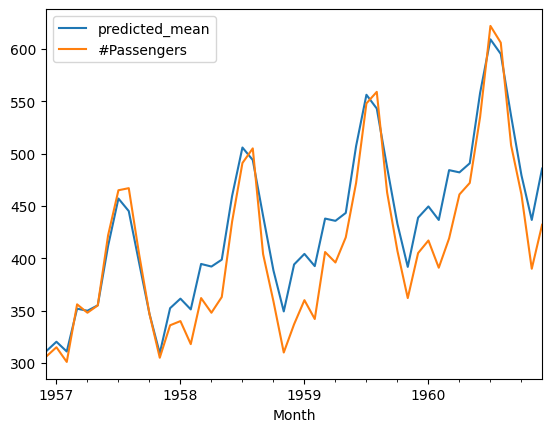

In [38]:
predction.plot(legend=True)
x_test['#Passengers'].plot(legend=True)
#This code plots both the predicted and actual values on the same graph.

In [39]:
import math
from sklearn.metrics import mean_squared_error

In [40]:
trainScore=math.sqrt(mean_squared_error(x_train['#Passengers'],train_prediction))
testScore=math.sqrt(mean_squared_error(x_test["#Passengers"],predction))
trainScore,testScore
#This code evaluates the performance of the SARIMAX model by calculating the RMSE for both the training and testing data. This provides insights into how well the model fits the data it was trained on and how well it generalizes to new, unseen data.

(16.142751214053153, 29.49357226833754)

In [41]:
forcast=result.predict(start=len(df),
                      end=(len(df)-1)+3*12,
                      typ="levels").rename('Forecust')
#It generates forecasts for future periods using the fitted SARIMAX model.
#It predicts values from the end of the existing data (len(df)) for the next 3 years (3*12 months)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


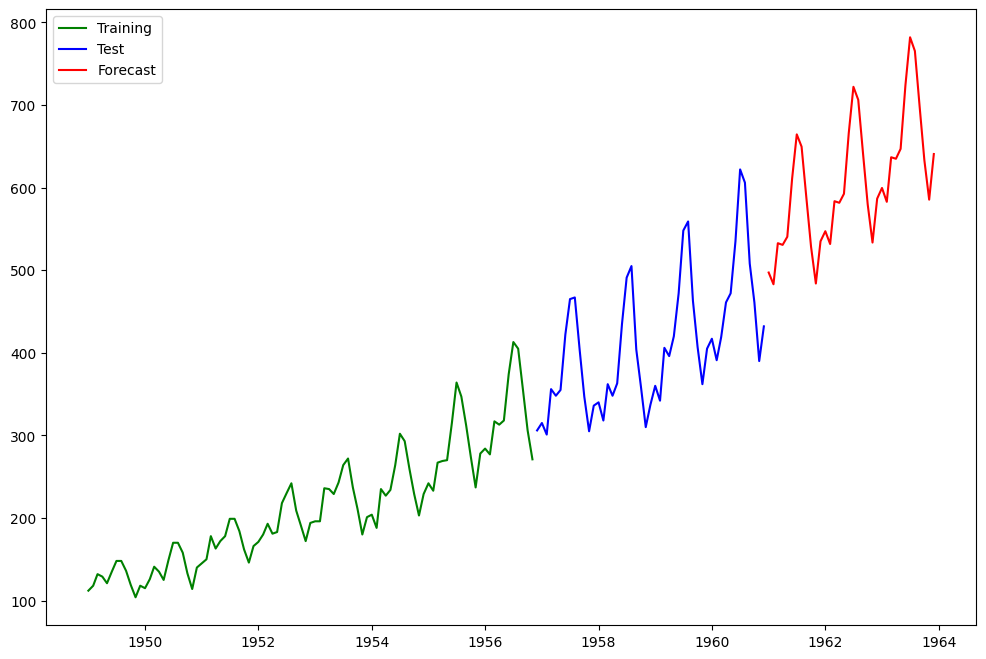

In [42]:
plt.figure(figsize=(12,8))
plt.plot(x_train["#Passengers"],label="Training",color='green')
plt.plot(x_test["#Passengers"],label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")

This code creates a plot that visualizes the training data, testing data, and forecasted values on the same graph, with different colors for each and a legend to distinguish them.